# 09-08 사전 훈련된 워드 임베딩(Pre-trained Word Embedding)

갖고 있는 훈련 데이터의 단어들을 임베딩 층(embedding layer)을 구현하여 임베딩 벡터로 학습 VS  방대한 코퍼스를 가지고 Word2vec, FastText, GloVe 등을 통해서 미리 훈련된 임베딩 벡터를 불러오는 방법

## 케라스 임베딩 층(Keras Embedding layer)

### 임베딩 층은 룩업 테이블이다.

어떤 단어 → 단어 집합의 크기 안에서 단어에 부여된 고유한 정수값 → 임베딩 층(단어 집합의 크기 X 임베딩 벡터의 차원) 통과 → 임베딩 벡터/밀집 벡터  
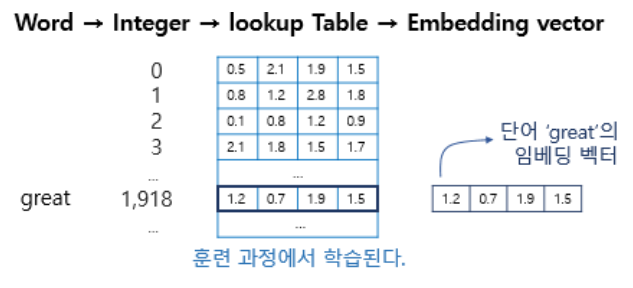

In [3]:
vocab_size = 20000
output_dim = 128
input_length = 500

v = Embedding(vocab_size, output_dim, input_length=input_length)

NameError: name 'Embedding' is not defined

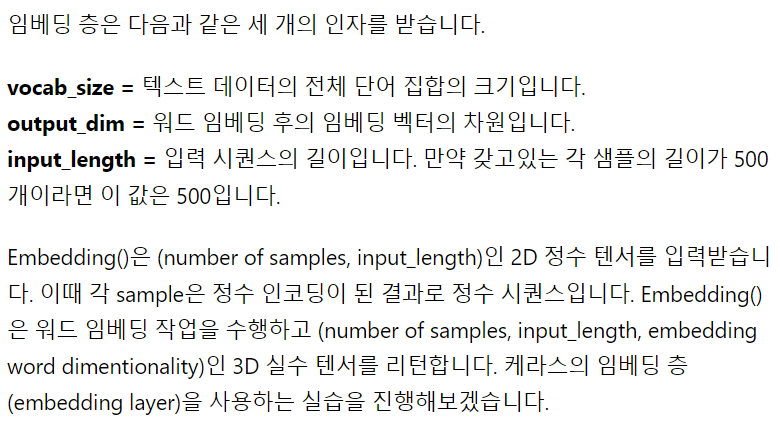

### 임베딩 층 사용하기

문장의 긍, 부정을 판단하는 감성 분류 모델을 만들어봅시다. 문장과 레이블 데이터를 만들었습니다. 긍정인 문장은 레이블 1, 부정인 문장은 레이블이 0입니다.

In [4]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

In [5]:
# 단어 집합 만들기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
vocab_size = len(tokenizer.word_index) + 1 # 패딩을 고려하여 +1
print('단어 집합 :',vocab_size)

단어 집합 : 16


In [6]:
# 정수 인코딩 수행
X_encoded = tokenizer.texts_to_sequences(sentences)
print('정수 인코딩 결과 :',X_encoded)

정수 인코딩 결과 : [[1, 2, 3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13], [14, 15]]


In [7]:
# 가장 길이기 긴 문장의 길이 구하기
max_len = max(len(l) for l in X_encoded)
print('최대 길이 :',max_len)

최대 길이 : 4


In [8]:
# 패딩 진행
X_train = pad_sequences(X_encoded, maxlen=max_len, padding='post')
y_train = np.array(y_train)
print('패딩 결과 :')
print(X_train)

패딩 결과 :
[[ 1  2  3  4]
 [ 5  6  0  0]
 [ 7  8  0  0]
 [ 9 10  0  0]
 [11 12  0  0]
 [13  0  0  0]
 [14 15  0  0]]


In [9]:
# 이진 분류 모델 설계
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

embedding_dim = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6867 - acc: 0.7143 - 622ms/epoch - 622ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6849 - acc: 0.7143 - 5ms/epoch - 5ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6831 - acc: 0.7143 - 4ms/epoch - 4ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6814 - acc: 0.7143 - 3ms/epoch - 3ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6796 - acc: 0.7143 - 6ms/epoch - 6ms/step
Epoch 6/100
1/1 - 0s - loss: 0.6778 - acc: 0.7143 - 3ms/epoch - 3ms/step
Epoch 7/100
1/1 - 0s - loss: 0.6760 - acc: 0.7143 - 5ms/epoch - 5ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6742 - acc: 0.7143 - 4ms/epoch - 4ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6724 - acc: 0.7143 - 4ms/epoch - 4ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6706 - acc: 0.7143 - 7ms/epoch - 7ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6688 - acc: 0.7143 - 5ms/epoch - 5ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6670 - acc: 0.7143 - 6ms/epoch - 6ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6652 - acc: 0.7143 - 5ms/epoch - 5ms/step
Epoch 14/100
1/1 - 0s - loss: 0.6634 - acc:

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 4)              64        
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


## 사전 훈련된 워드 임베딩(Pre-Trained Word Embedding) 사용하기

케라스의 Embedding()을 사용하여 처음부터 임베딩 벡터값을 학습하기도 하지만, 때로는 이미 훈련되어져 있는 워드 임베딩을 가져와서 이를 임베딩 벡터로 사용하기도 합니다. 훈련 데이터가 적은 상황이라면 케라스의 Embedding()으로 해당 문제를 풀기에 최적화 된 임베딩 벡터값을 얻는 것이 쉽지 않습니다. 이 경우 해당 문제에 특화된 것은 아니지만 보다 많은 훈련 데이터로 이미 Word2Vec이나 GloVe 등으로 학습되어져 있는 임베딩 벡터들을 사용하는 것이 성능의 개선을 가져올 수 있습니다.

### 사전 훈련된 GloVe 사용하기

In [11]:
from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

In [12]:
# glove.6B.100d.txt에 있는 모든 임베딩 벡터들을 딕셔너리를 사용해 불러오기
embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]

    # 100개의 값을 가지는 array로 변환
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [13]:
# 임의의 단어 'respectable'의 임베딩 벡터값과 크기를 출력
print(embedding_dict['respectable'])
print('벡터의 차원 수 :',len(embedding_dict['respectable']))

[-0.049773   0.19903    0.10585    0.1391    -0.32395    0.44053
  0.3947    -0.22805   -0.25793    0.49768    0.15384   -0.08831
  0.0782    -0.8299    -0.037788   0.16772   -0.45197   -0.17085
  0.74756    0.98256    0.81872    0.28507    0.16178   -0.48626
 -0.006265  -0.92469   -0.30625   -0.067318  -0.046762  -0.76291
 -0.0025264 -0.018795   0.12882   -0.52457    0.3586     0.43119
 -0.89477   -0.057421  -0.53724    0.25587    0.55195    0.44698
 -0.24252    0.29946    0.25776   -0.8717     0.68426   -0.05688
 -0.1848    -0.59352   -0.11227   -0.57692   -0.013593   0.18488
 -0.32507   -0.90171    0.17672    0.075601   0.54896   -0.21488
 -0.54018   -0.45882   -0.79536    0.26331    0.18879   -0.16363
  0.3975     0.1099     0.1164    -0.083499   0.50159    0.35802
  0.25677    0.088546   0.42108    0.28674   -0.71285   -0.82915
  0.15297   -0.82712    0.022112   1.067     -0.31776    0.1211
 -0.069755  -0.61327    0.27308   -0.42638   -0.085084  -0.17694
 -0.0090944  0.1109     0.

벡터값이 출력되며 벡터의 차원 수는 100입니다. 풀고자 하는 문제의 단어 집합 크기의 행과 100개의 열을 가지는 행렬 생성합니다. 이 행렬의 값은 전부 0으로 채웁니다. 이 행렬에 사전 훈련된 임베딩 값을 넣어줄 것입니다.

In [19]:
embedding_matrix = np.zeros((vocab_size, 100))
print('임베딩 행렬의 크기(shape) :', embedding_matrix.shape)

임베딩 행렬의 크기(shape) : (16, 100)


In [20]:
print(tokenizer.word_index.items())

dict_items([('nice', 1), ('great', 2), ('best', 3), ('amazing', 4), ('stop', 5), ('lies', 6), ('pitiful', 7), ('nerd', 8), ('excellent', 9), ('work', 10), ('supreme', 11), ('quality', 12), ('bad', 13), ('highly', 14), ('respectable', 15)])


In [22]:
print('단어 great의 맵핑된 정수 :', tokenizer.word_index['great'])

단어 great의 맵핑된 정수 : 2


In [23]:
# 사전 훈련된 GloVe에서 'great'의 벡터값을 확인
print(embedding_dict['great'])

[-0.013786   0.38216    0.53236    0.15261   -0.29694   -0.20558
 -0.41846   -0.58437   -0.77355   -0.87866   -0.37858   -0.18516
 -0.128     -0.20584   -0.22925   -0.42599    0.3725     0.26077
 -1.0702     0.62916   -0.091469   0.70348   -0.4973    -0.77691
  0.66045    0.09465   -0.44893    0.018917   0.33146   -0.35022
 -0.35789    0.030313   0.22253   -0.23236   -0.19719   -0.0053125
 -0.25848    0.58081   -0.10705   -0.17845   -0.16206    0.087086
  0.63029   -0.76649    0.51619    0.14073    1.019     -0.43136
  0.46138   -0.43585   -0.47568    0.19226    0.36065    0.78987
  0.088945  -2.7814    -0.15366    0.01015    1.1798     0.15168
 -0.050112   1.2626    -0.77527    0.36031    0.95761   -0.11385
  0.28035   -0.02591    0.31246   -0.15424    0.3778    -0.13599
  0.2946    -0.31579    0.42943    0.086969   0.019169  -0.27242
 -0.31696    0.37327    0.61997    0.13889    0.17188    0.30363
 -1.2776     0.044423  -0.52736   -0.88536   -0.19428   -0.61947
 -0.10146   -0.26301  

단어 집합의 모든 단어에 대해서 사전 훈련된 GloVe의 임베딩 벡터들을 맵핑한 후 'great'의 벡터값이 의도한 인덱스의 위치에 삽입되었는지 확인해보겠습니다.

In [25]:
for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = embedding_dict.get(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

In [26]:
# 이전에 확인한 사전에 훈련된 GloVe에서의 'great'의 벡터값과 일치
embedding_matrix[2]

array([-0.013786  ,  0.38216001,  0.53236002,  0.15261   , -0.29694   ,
       -0.20558   , -0.41846001, -0.58437002, -0.77354997, -0.87866002,
       -0.37858   , -0.18516   , -0.12800001, -0.20584001, -0.22925   ,
       -0.42598999,  0.3725    ,  0.26076999, -1.07019997,  0.62915999,
       -0.091469  ,  0.70348001, -0.4973    , -0.77691001,  0.66044998,
        0.09465   , -0.44893   ,  0.018917  ,  0.33146   , -0.35021999,
       -0.35789001,  0.030313  ,  0.22253001, -0.23236001, -0.19719   ,
       -0.0053125 , -0.25848001,  0.58081001, -0.10705   , -0.17845   ,
       -0.16205999,  0.087086  ,  0.63028997, -0.76648998,  0.51618999,
        0.14072999,  1.01900005, -0.43136001,  0.46138   , -0.43584999,
       -0.47567999,  0.19226   ,  0.36065   ,  0.78987002,  0.088945  ,
       -2.78139997, -0.15366   ,  0.01015   ,  1.17980003,  0.15167999,
       -0.050112  ,  1.26259995, -0.77526999,  0.36030999,  0.95761001,
       -0.11385   ,  0.28035   , -0.02591   ,  0.31246001, -0.15

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

output_dim = 100

model = Sequential()
# Embedding layer에 embedding_matrix를 초기값으로 설정
# 사전 훈련된 워드 임베딩을 그대로 사용할 경우 추가 훈련을 하지 않는다는 의미에서 trainable의 인자값을 False
e = Embedding(vocab_size, output_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.8149 - acc: 0.2857 - 677ms/epoch - 677ms/step
Epoch 2/100
1/1 - 0s - loss: 0.7949 - acc: 0.2857 - 4ms/epoch - 4ms/step
Epoch 3/100
1/1 - 0s - loss: 0.7756 - acc: 0.2857 - 6ms/epoch - 6ms/step
Epoch 4/100
1/1 - 0s - loss: 0.7567 - acc: 0.2857 - 3ms/epoch - 3ms/step
Epoch 5/100
1/1 - 0s - loss: 0.7385 - acc: 0.2857 - 10ms/epoch - 10ms/step
Epoch 6/100
1/1 - 0s - loss: 0.7207 - acc: 0.2857 - 9ms/epoch - 9ms/step
Epoch 7/100
1/1 - 0s - loss: 0.7035 - acc: 0.4286 - 6ms/epoch - 6ms/step
Epoch 8/100
1/1 - 0s - loss: 0.6868 - acc: 0.4286 - 8ms/epoch - 8ms/step
Epoch 9/100
1/1 - 0s - loss: 0.6705 - acc: 0.4286 - 4ms/epoch - 4ms/step
Epoch 10/100
1/1 - 0s - loss: 0.6548 - acc: 0.4286 - 11ms/epoch - 11ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6395 - acc: 0.4286 - 21ms/epoch - 21ms/step
Epoch 12/100
1/1 - 0s - loss: 0.6246 - acc: 0.4286 - 8ms/epoch - 8ms/step
Epoch 13/100
1/1 - 0s - loss: 0.6102 - acc: 0.4286 - 15ms/epoch - 15ms/step
Epoch 14/100
1/1 - 0s - loss: 0.596

### 사전 훈련된 Word2Vec 사용하기

In [32]:
import gensim

word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

print('모델의 크기(shape) :',word2vec_model.vectors.shape) # 모델의 크기 확인
# 300의 차원을 가진 Word2Vec 벡터가 3,000,000개

모델의 크기(shape) : (3000000, 300)


In [34]:
embedding_matrix = np.zeros((vocab_size, 300))
print('임베딩 행렬의 크기(shape) :',np.shape(embedding_matrix))

임베딩 행렬의 크기(shape) : (16, 300)


In [35]:
# 만약 word2vec_model에 특정 단어의 임베딩 벡터가 없다면 None을 리턴
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [36]:
for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = get_vector(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

In [37]:
print(word2vec_model['nice'])

[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

In [38]:
print('단어 nice의 맵핑된 정수 :', tokenizer.word_index['nice'])

단어 nice의 맵핑된 정수 : 1


In [39]:
print(embedding_matrix[1])

[ 0.15820312  0.10595703 -0.18945312  0.38671875  0.08349609 -0.26757812
  0.08349609  0.11328125 -0.10400391  0.17871094 -0.12353516 -0.22265625
 -0.01806641 -0.25390625  0.13183594  0.0859375   0.16113281  0.11083984
 -0.11083984 -0.0859375   0.0267334   0.34570312  0.15136719 -0.00415039
  0.10498047  0.04907227 -0.06982422  0.08642578  0.03198242 -0.02844238
 -0.15722656  0.11865234  0.36132812  0.00173187  0.05297852 -0.234375
  0.11767578  0.08642578 -0.01123047  0.25976562  0.28515625 -0.11669922
  0.38476562  0.07275391  0.01147461  0.03466797  0.18164062 -0.03955078
  0.04199219  0.01013184 -0.06054688  0.09765625  0.06689453  0.14648438
 -0.12011719  0.08447266 -0.06152344  0.06347656  0.3046875  -0.35546875
 -0.2890625   0.19628906 -0.33203125 -0.07128906  0.12792969  0.09619141
 -0.12158203 -0.08691406 -0.12890625  0.27734375  0.265625    0.1796875
  0.12695312  0.06298828 -0.34375    -0.05908203  0.0456543   0.171875
  0.08935547  0.14648438 -0.04638672 -0.00842285 -0.0279

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

model = Sequential()
model.add(Input(shape=(max_len,), dtype='int32'))
e = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
1/1 - 1s - loss: 0.6806 - acc: 0.5714 - 909ms/epoch - 909ms/step
Epoch 2/100
1/1 - 0s - loss: 0.6631 - acc: 0.5714 - 5ms/epoch - 5ms/step
Epoch 3/100
1/1 - 0s - loss: 0.6460 - acc: 0.5714 - 6ms/epoch - 6ms/step
Epoch 4/100
1/1 - 0s - loss: 0.6294 - acc: 0.7143 - 10ms/epoch - 10ms/step
Epoch 5/100
1/1 - 0s - loss: 0.6133 - acc: 0.7143 - 7ms/epoch - 7ms/step
Epoch 6/100
1/1 - 0s - loss: 0.5978 - acc: 0.8571 - 6ms/epoch - 6ms/step
Epoch 7/100
1/1 - 0s - loss: 0.5827 - acc: 0.8571 - 8ms/epoch - 8ms/step
Epoch 8/100
1/1 - 0s - loss: 0.5681 - acc: 0.8571 - 7ms/epoch - 7ms/step
Epoch 9/100
1/1 - 0s - loss: 0.5539 - acc: 0.8571 - 20ms/epoch - 20ms/step
Epoch 10/100
1/1 - 0s - loss: 0.5403 - acc: 0.8571 - 9ms/epoch - 9ms/step
Epoch 11/100
1/1 - 0s - loss: 0.5270 - acc: 0.8571 - 10ms/epoch - 10ms/step
Epoch 12/100
1/1 - 0s - loss: 0.5142 - acc: 0.8571 - 11ms/epoch - 11ms/step
Epoch 13/100
1/1 - 0s - loss: 0.5018 - acc: 0.8571 - 10ms/epoch - 10ms/step
Epoch 14/100
1/1 - 0s - loss: 0.4